# Example: Local Minima

In [1]:
# the usual setup
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import scipy.stats

## Setup

We define the true function (with parameters) and generate a data set.

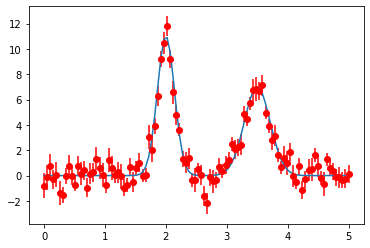

In [2]:
def f(x,a,b):
    pa = 11. * np.exp( - ((x - a) / 0.2) ** 2)
    pb = 7. * np.exp( - ((x - b) / 0.3) ** 2)
    return pa+pb

opt = (2.0,3.5)

x = np.linspace(0.0, 5.0,100)
ey = np.random.uniform( 0.5, 1.0, len(x) )
y = np.random.normal(f(x,*opt),ey)

plt.errorbar(x,y,ey,0,"ro")
plt.plot(x,f(x,*opt))

## Visual check of $\chi^2$

Before we run the actual fit, let's look what we would expect.

In [3]:
def chi2(a,b):
    return np.sum( ( (y-f(x,a,b)) / ey )**2 )

(60, 60)


Text(0, 0.5, 'b')

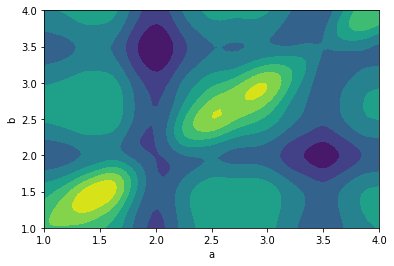

In [4]:
aa = np.linspace(1.0,4.0,60)
bb = np.linspace(1.0,4.0,60)
cc = np.zeros((len(aa),len(bb)))
print(cc.shape)
for ia,a in enumerate(aa):
    for ib,b in enumerate(bb):
#         print(a,m,chi2(a,m))
        cc[ib,ia] = chi2(a,b)
plt.contourf(aa,bb,cc)
plt.xlabel("a")
plt.ylabel("b")

## Fitting

Now we run the fit with the positions of the two gaussians as free parameters, and a fixed widht and amplitude. First, we define a function that runs the fit and shows the results.

In [5]:
def run_fit(a0=None,b0=None):
    if a0 is None or b0 is None:
        p0 = None
    else:
        p0 = (a0,b0)
    popt,pcov = scipy.optimize.curve_fit( f, x, y, sigma=ey, p0=p0 )

    plt.errorbar(x,y,ey,0,"ro")
    plt.plot(x,f(x,*popt),"g")

    print("popt:",popt)
    print("chi2:", chi2(*popt))

In our first attempt, we run the fit without specifying a starting point for the search.

popt: [0.89151315 2.00173035]
chi2: 1778.031922256903


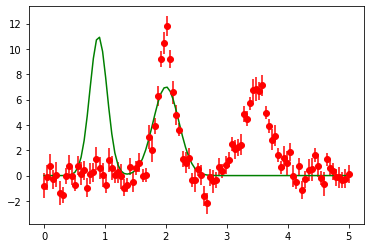

In [6]:
run_fit()

If we start close to the expected values, we get the expected result.

popt: [2.00433143 3.4815388 ]
chi2: 105.172839134475


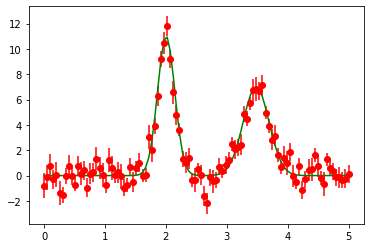

In [7]:
run_fit(1.7,4.0)

But is is quite simple to guide the fit into the wrong local minimum.

popt: [3.49293249 2.0016549 ]
chi2: 358.42688548736504


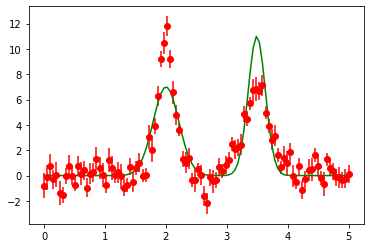

In [8]:
run_fit(3.4,2.1)